In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import calendar
import argparse
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)
import xarray as xr
import wrf
from __future__ import print_function

from netCDF4 import Dataset
from wrf import getvar, ALL_TIMES
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib.patches as patches

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


In [3]:
dir = "final_project/newvars/"
d1 = [
Dataset(dir + "wrfout_d01_2022-08-03_00:00:00")
              ]

d2 = [
Dataset(dir + "wrfout_d02_2022-08-03_00:00:00")
              ]
ter_d1 = getvar(d1, "HGT")
ter_d2 = getvar(d2, "HGT")


In [46]:
# print(to_np(ter_d2['XLAT'].max()) - to_np(ter_d1['XLAT'].min()))
# print(to_np(ter_d2['XLONG'].max()) - to_np(ter_d1['XLONG'].min()))
np.linspace(to_np(ter_d2['XLONG'].min()), to_np(ter_d1['XLONG'].max()), num = 10)

array([-144.50689697, -139.35403781, -134.20117866, -129.0483195 ,
       -123.89546034, -118.74260118, -113.58974202, -108.43688287,
       -103.28402371,  -98.13116455])

In [61]:
def add_ticks(ax, labelpad=None):
    """Only works for major ticks on the left and bottom."""
    ax.grid(False)
    ax.tick_params('both', which='major')
    # if labelpad is None:
    #     labelpad = pplt.rc['tick.len'] + 2

    for gl in ax._gridliners:
        gl.xpadding = gl.ypadding = labelpad
    # ax.format(labelpad=labelpad)
    ax.figure.canvas.draw_idle()  # necessary for generating xlabel_artists...

    for gl in ax._gridliners:
        xy = np.array([t.get_position() for t in gl.bottom_label_artists if t.get_visible()])
        if xy.any():
            ax.set_xticks(xy[:, 0])
            ax.set_xticklabels([])

        xy = np.array([t.get_position() for t in gl.left_label_artists if t.get_visible()])
        if xy.any():
            ax.set_yticks(xy[:, 1])
            ax.set_yticklabels([])


In [4]:
print(ter_d2['XLONG'].max())
print(ter_d2['XLONG'].min())
print(ter_d2['XLAT'].max())
print(ter_d2['XLAT'].min())


<xarray.DataArray 'XLONG' ()>
array(-118.35488892)
Coordinates:
    XTIME    float32 0.0
    Time     datetime64[ns] 2022-08-03
<xarray.DataArray 'XLONG' ()>
array(-144.50689697)
Coordinates:
    XTIME    float32 0.0
    Time     datetime64[ns] 2022-08-03
<xarray.DataArray 'XLAT' ()>
array(49.81725311)
Coordinates:
    XTIME    float32 0.0
    Time     datetime64[ns] 2022-08-03
<xarray.DataArray 'XLAT' ()>
array(33.00825882)
Coordinates:
    XTIME    float32 0.0
    Time     datetime64[ns] 2022-08-03


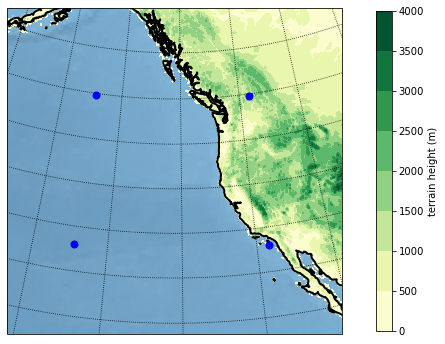

<Figure size 1080x576 with 0 Axes>

In [70]:
#### map of domains

# draw two boxes over a topography map of the lat/lon coords
# (59.49247, -93.12680)
# (17.77059, -164.97524)

lats, lons = latlon_coords(ter_d1)

# Get the cartopy mapping object
cart_proj = get_cartopy(ter_d1)

# Create a figure


# def init():
#     ax.contourf()
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=cart_proj)
# ax = plt.axes(projection=crs.Mercator())

ax.coastlines('50m', linewidth=2)
ax.stock_img()
ax.set_xlim(cartopy_xlim(ter_d1))
ax.set_ylim(cartopy_ylim(ter_d1))
plt.contourf(to_np(lons), to_np(lats),
            # ter_d1,
 np.where(to_np(ter_d1) <= 0, np.nan, to_np(ter_d1) ),
                 # , 10,
                 transform=crs.PlateCarree(),
                             cmap=get_cmap("YlGn"))


ax.plot(to_np(ter_d2['XLONG'].max()),to_np(ter_d2['XLAT'].max()), 'bo', markersize=7, transform=ccrs.Geodetic())
ax.plot(to_np(ter_d2['XLONG'].min()),to_np(ter_d2['XLAT'].max()), 'bo', markersize=7, transform=ccrs.Geodetic())
ax.plot(to_np(ter_d2['XLONG'].max()),to_np(ter_d2['XLAT'].min()), 'bo', markersize=7, transform=ccrs.Geodetic())
ax.plot(to_np(ter_d2['XLONG'].min()),to_np(ter_d2['XLAT'].min()), 'bo', markersize=7, transform=ccrs.Geodetic())
ax.gridlines(color="black", linestyle="dotted")

# add_ticks(ax)
# ax.ylabel("Latitude", fontsize=14)
# ax.xlabel("Longitude", fontsize=14)
# plt.yticks([])
cb = plt.colorbar(ax=ax, shrink=.98)
cb.set_label('terrain height (m)')
# plt.title("Figure 1: Locations of Image Data Sites and ASOS Stations")
plt.figure(figsize=(15,8))
# plt.legend()
# save_fig("Percent of Hours with Fog")
plt.show()
